This dataset, titled "Students Performance in Exams", was obtained from Kaggle. It contains data on the exam results of students in math, reading, and writing, along with demographic and educational background details such as gender, parental education, lunch type, and test preparation course status.

Project Objective:
Analyze exam performance of students based on gender, parental education, lunch status, and test preparation, to find patterns that can help schools improve student outcomes

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [33]:
#Q1What are the average scores in math, reading, and writing?

In [8]:
print(df['math score'].mean())
print(df['reading score'].mean())
print(df['writing score'].mean())

66.089
69.169
68.054


In [9]:
#What percentage of students scored:
#Above 90 in each subject?
#Below 50 in each subject?

In [10]:
print('above 90 in each subject percentage',(len(df[(df['math score']>90) & (df['reading score']>90) & (df['writing score']>90)])*100)/len(df),'%')
print('below 50 in each subject percentage',(len(df[(df['math score']<50) & (df['reading score']<50) & (df['writing score']<50)])*100)/len(df),'%')

above 90 in each subject percentage 2.3 %
below 50 in each subject percentage 5.5 %


In [71]:
#Q2Do male or female students score higher in:
#Math?
#Reading?
#Writing?
#Who is more likely to be a top performer (avg score >= 85)?

In [17]:
df.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [13]:
df['avg_marks']=df[['math score','reading score','writing score']].mean(axis=1)


In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [18]:
df[df['avg_marks']>=85]['gender'].value_counts(normalize=True)

gender
female    0.646552
male      0.353448
Name: proportion, dtype: float64

On average, males scored higher in math.
- Females scored higher in reading and writing, showing stronger language skills.
- Among students with an average score ≥ 85:
  - 64% were female
  - 35% were male
    
These insights can help educators design targeted interventions, like supporting boys in reading/writing or girls in math enrichment programs.

In [31]:
#Q3How does the parent's level of education affect student scores?
#Is there a clear trend — do higher-educated parents have higher-scoring children?

In [21]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [25]:
df.groupby('parental level of education')['avg_marks'].mean().sort_values(ascending=False)

parental level of education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939
Name: avg_marks, dtype: float64

It’s pretty clear from the data — students whose parents have higher levels of education generally score better.
Those whose parents have a master’s degree had the highest average marks (around 73.6), followed by bachelor’s and associate’s degrees.
At the other end, students whose parents only finished high school had the lowest average scores, roughly 63.
Schools may consider additional academic support or parental engagement strategies for students whose parents have lower educational attainment.

In [42]:
#Q4Lunch Type Impact
#Do students with standard lunch perform better than those with free/reduced lunch?

In [43]:
df.groupby('lunch')['avg_marks'].mean().sort_values(ascending=False)

lunch
standard        70.837209
free/reduced    62.199061
Name: avg_marks, dtype: float64

Students who had standard lunch scored an average of about 70.8, while those on free or reduced lunch averaged only around 62.2.
It’s a strong signal that students from underprivileged backgrounds may need more academic support or resources to help close this gap.

In [44]:
#Q5.Test Preparation Course How much does test preparation help?
#What’s the average score difference between:
#Those who completed it and Those who didn’t

In [45]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avg_marks'],
      dtype='object')

In [46]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [47]:
df.groupby('test preparation course')['avg_marks'].mean()

test preparation course
completed    72.669460
none         65.038941
Name: avg_marks, dtype: float64

students with test preparation course performed better than studnets with no test preparation 

In [48]:
#Q6. Score Distributions & Correlation
#Which subjects are most correlated?
#Are reading and writing more connected than math and writing?

<Axes: xlabel='reading score', ylabel='writing score'>

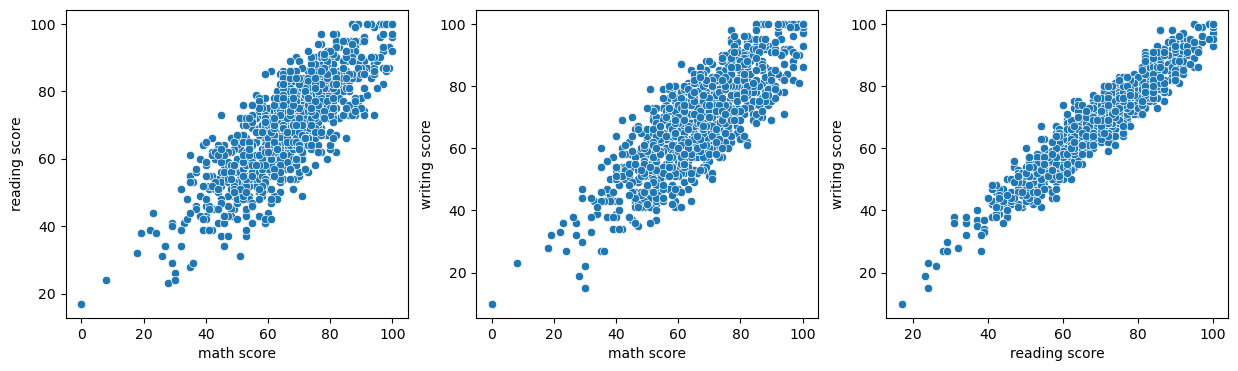

In [66]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='math score', y='reading score')
plt.subplot(1,3,2)
sns.scatterplot(data=df,x='math score', y='writing score')
plt.subplot(1,3,3)
sns.scatterplot(data=df,x='reading score', y='writing score')

In [62]:
df[['math score', 'reading score','writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


reading and writing scores are strongly connected — with a correlation of around 0.95. This means students who read well almost always write well too.
In comparison, math scores are only moderately related to the other two subjects (around 0.81), suggesting a bit of independence in skills.
This could mean that math performance depends more on problem-solving ability, while reading and writing build on similar language skills.

In [70]:
#Q7. Top Performer Profiles
#What common traits (gender, lunch, parent edu, test prep) do students with avg score >= 85 have?

In [79]:
df[df['avg_marks']>=85]['gender'].value_counts(normalize=True)

gender
female    0.646552
male      0.353448
Name: proportion, dtype: float64

In [80]:
df[df['avg_marks']>=85]['lunch'].value_counts(normalize=True)

lunch
standard        0.87069
free/reduced    0.12931
Name: proportion, dtype: float64

In [81]:
df[df['avg_marks']>=85]['parental level of education'].value_counts(normalize=True)

parental level of education
associate's degree    0.293103
some college          0.224138
bachelor's degree     0.189655
master's degree       0.137931
some high school      0.094828
high school           0.060345
Name: proportion, dtype: float64

In [82]:
df[df['avg_marks']>=85]['test preparation course'].value_counts(normalize=True)

test preparation course
completed    0.543103
none         0.456897
Name: proportion, dtype: float64

Among students scoring 85 or above:

-64% were female
-87% had standard lunch
-54% had completed the test preparation course
Interestingly, while the highest average scores were seen among students whose parents held master’s or bachelor’s degrees, the most common parental education level among top scorers (avg ≥ 85) was actually associate's degree, followed by some college.